In [73]:
from photometry_tools import Image, Atlas
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# read the Image.
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_SDSS_r.fits')
data = hdul[0].data
header = hdul[0].header
direct_coord = SkyCoord('02h42m40.7091669408s -00d00m47.859690204s')
ra, dec = direct_coord.ra, direct_coord.dec
img = Image(data=data, header=header,target_coordinate=(ra.value, dec.value))

In [88]:
# roughly estimate the background properties.
img.background_properties(mask_type='quick')

(1.1184108922169642e-06, 1.1153339653845648e-06, 7.871416881157292e-08)

<AxesSubplot: >

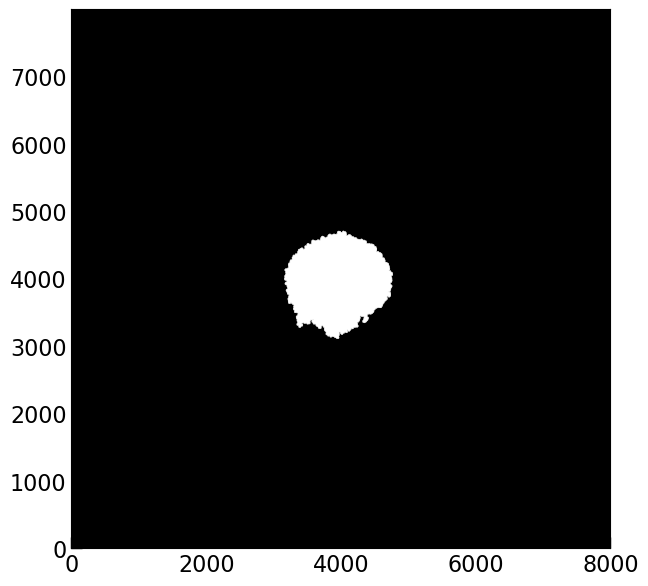

In [89]:
# build up the target galaxy mask.
img.mask_galaxy(thres=1, iter=3)
plot_image(img._mask_galaxy)

<AxesSubplot: >

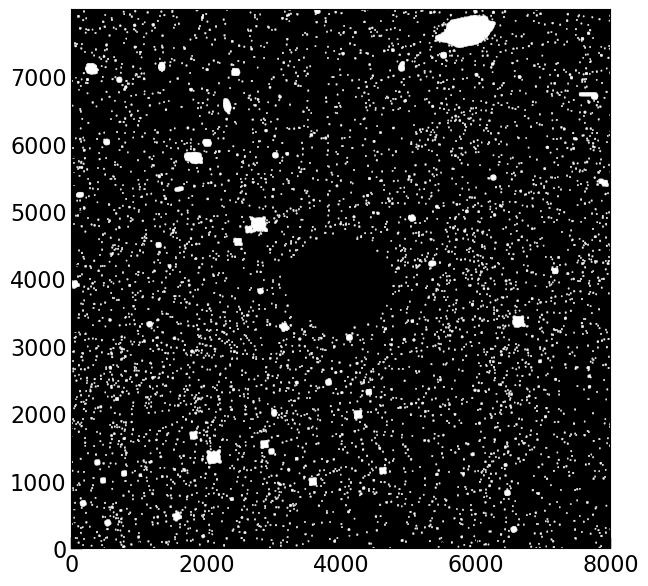

In [90]:
# build up the stars mask.
img.mask_stars(iter_extend=2, iter_point=1)
plot_image(img._mask_stars)

<AxesSubplot: >

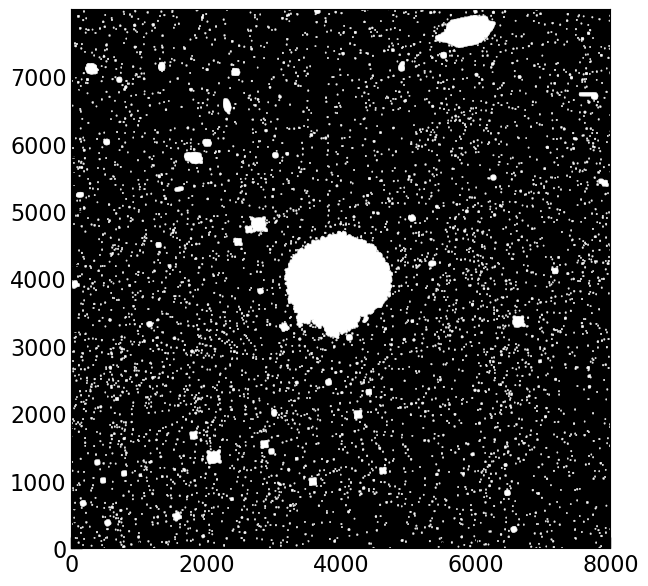

In [91]:
# build up the mask for estimating the backgroud.
img.mask_background()
plot_image(img._mask_background)

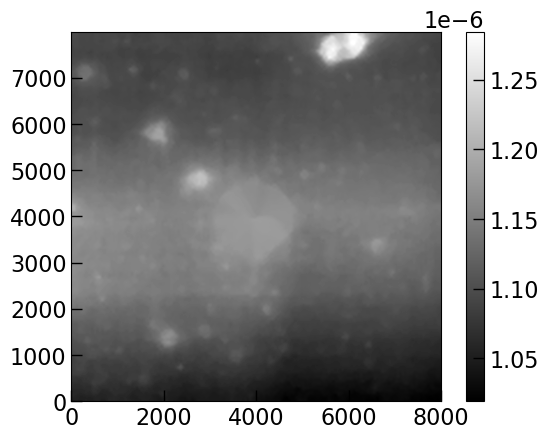

In [92]:
# get the background model.
from matplotlib import pyplot as plt
img.background_model()
plt.imshow(img._background_model, origin='lower', cmap='gray')
plt.colorbar()

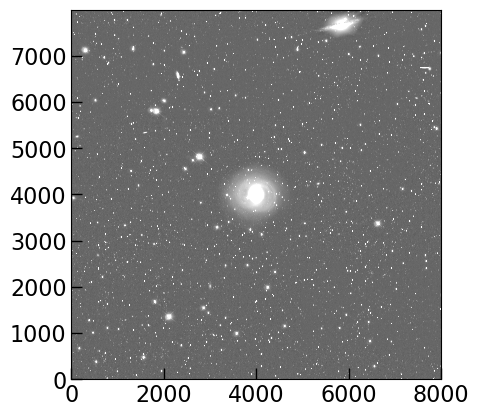

In [93]:
# background subtraction.
img.background_subtract()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)

Ra,Dec,Gmag
float64,float64,float64
40.62269272650629,-0.0891785677016624,17.533682
40.68100377482954,0.05136601401330495,16.560606
40.67621106755435,-0.0601491630213349,17.134809
40.7545400523783,0.014398961913776098,15.963648
40.59802560456929,-0.021607967128392788,17.276964
40.68538546140275,-0.11009851638278935,12.148796
40.584387588341315,0.009200130662899451,18.328302
...,...,...
40.69014422000641,0.051910781728768916,12.95543


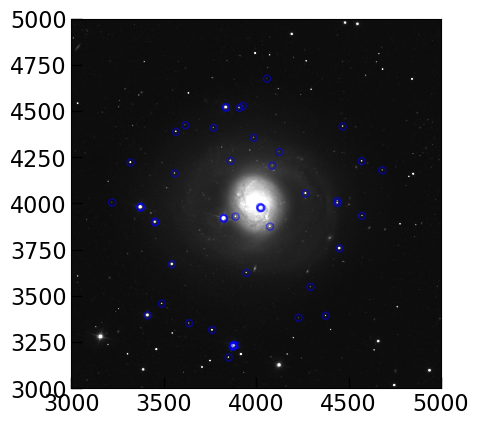

In [94]:
# detect the stars overlap with the target galaxy.
img.get_sources_galaxyarea(plot=True, percent=99.9, xlim=(3000,5000), ylim=(3000,5000))

In [112]:
# clean all the foreground stars.
img.remove_sources_simple(length=50)


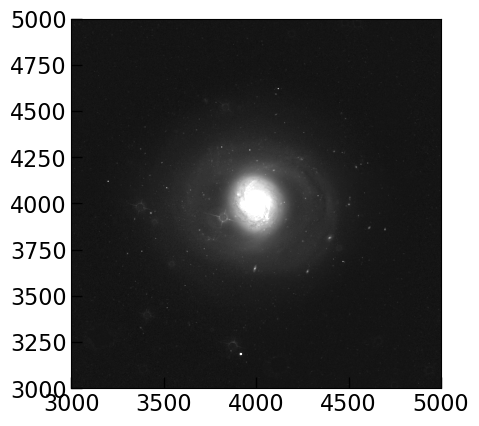

(3000.0, 5000.0)

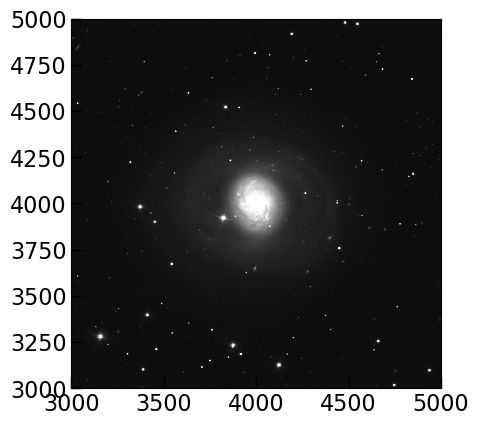

In [115]:
# comparsion.(local)
norm = simple_norm(img._image_cleaned, stretch='asinh', percent=99.95)
plt.imshow(img._image_cleaned, origin='lower', cmap='gray', norm=norm)
plt.xlim(3000,5000)
plt.ylim(3000,5000)
plt.show()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.9)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)
plt.xlim(3000,5000)
plt.ylim(3000,5000)
plt.show()

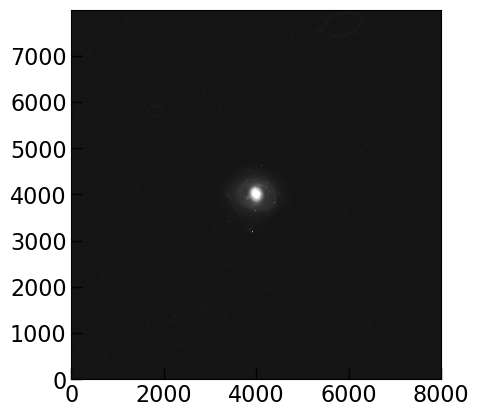

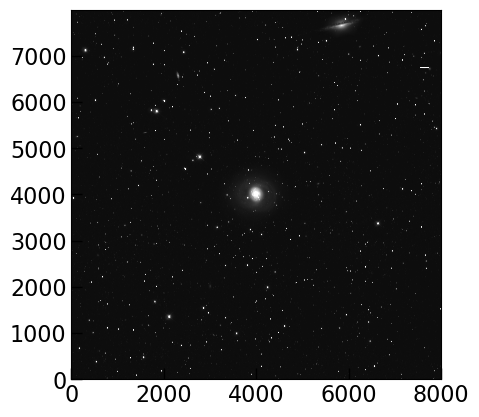

In [116]:
# comparsion.(whole image)
norm = simple_norm(img._image_cleaned, stretch='asinh', percent=99.95)
plt.imshow(img._image_cleaned, origin='lower', cmap='gray', norm=norm)
plt.show()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.9)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)
plt.show()